In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud 
from wordcloud import WordCloud, STOPWORDS
import re
import string
import math

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv("HotelReview_Clean_v1.1.csv")

In [4]:
data.head()

,Unnamed: 0,hotel_name,overall_rating,date_of_review,user_name,review_rating,review_title,review_text,date_of_stay,contributions,...,value_rating,rooms_rating,location_rating,clean_rating,service_rating,sleep_rating,month_of_review,month_of_stay,quarter_of_review,quarter_of_stay
0,0,Innside New York NoMad,45,22-Mar,Kim C,5.0,Great hotel!,We stayed in a family loft which is two connec...,March 2022,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Mar,March,Q1,Q1
1,1,Innside New York NoMad,45,21-Jun,Peggy M,5.0,The Innside Front Desk Staff,I just want to take a moment to say how wonder...,May 2021,8,...,0.0,4.0,0.0,5.0,5.0,0.0,Jun,May,Q2,Q2
2,2,Innside New York NoMad,45,4-Mar,Imran,5.0,NYC gem,"I go to NYC a lot, and this is hands down the ...",June 2021,2,...,5.0,0.0,5.0,0.0,5.0,0.0,Mar,June,Q1,Q2
3,3,Innside New York NoMad,45,2-Mar,Jay B,5.0,Great Experience!,"I don't usually write reviews, but because of ...",February 2022,0,...,5.0,5.0,0.0,0.0,5.0,0.0,Mar,February,Q1,Q1
4,4,Innside New York NoMad,45,22-Feb,Jeweliana159,5.0,"Amazing Hospitality Team - Kudos to Christina,...",I've stayed here on numerous occasions before ...,February 2022,25,...,5.0,0.0,0.0,0.0,5.0,0.0,Feb,February,Q1,Q1


In [5]:
del data["Unnamed: 0"]
data.head(2)

,hotel_name,overall_rating,date_of_review,user_name,review_rating,review_title,review_text,date_of_stay,contributions,helpful_votes,value_rating,rooms_rating,location_rating,clean_rating,service_rating,sleep_rating,month_of_review,month_of_stay,quarter_of_review,quarter_of_stay
0,Innside New York NoMad,45,22-Mar,Kim C,5.0,Great hotel!,We stayed in a family loft which is two connec...,March 2022,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Mar,March,Q1,Q1
1,Innside New York NoMad,45,21-Jun,Peggy M,5.0,The Innside Front Desk Staff,I just want to take a moment to say how wonder...,May 2021,8,11,0.0,4.0,0.0,5.0,5.0,0.0,Jun,May,Q2,Q2


In [6]:
data.shape

(1115, 20)

In [7]:
data.corr()

,overall_rating,review_rating,contributions,helpful_votes,value_rating,rooms_rating,location_rating,clean_rating,service_rating,sleep_rating
overall_rating,1.000000,0.090441,-0.020950,-0.040424,-0.059563,-0.050714,-0.050160,-0.030687,0.000168,-0.055971
review_rating,0.090441,1.000000,-0.034467,-0.077291,0.046352,0.046782,0.038905,0.051462,0.067265,0.045119
contributions,-0.020950,-0.034467,1.000000,0.682356,-0.023740,-0.022342,-0.024937,-0.024443,-0.027270,-0.025708
helpful_votes,-0.040424,-0.077291,0.682356,1.000000,-0.045075,-0.038896,-0.041359,-0.045748,-0.045258,-0.039639
value_rating,-0.059563,0.046352,-0.023740,-0.045075,1.000000,0.728445,0.750696,0.649471,0.787675,0.713376
rooms_rating,-0.050714,0.046782,-0.022342,-0.038896,0.728445,1.000000,0.628023,0.802283,0.788806,0.669804
location_rating,-0.050160,0.038905,-0.024937,-0.041359,0.750696,0.628023,1.000000,0.732942,0.757903,0.783491
clean_rating,-0.030687,0.051462,-0.024443,-0.045748,0.649471,0.802283,0.732942,1.000000,0.816095,0.669610
service_rating,0.000168,0.067265,-0.027270,-0.045258,0.787675,0.788806,0.757903,0.816095,1.000000,0.740922
sleep_rating,-0.055971,0.045119,-0.025708,-0.039639,0.713376,0.669804,0.783491,0.669610,0.740922,1.000000


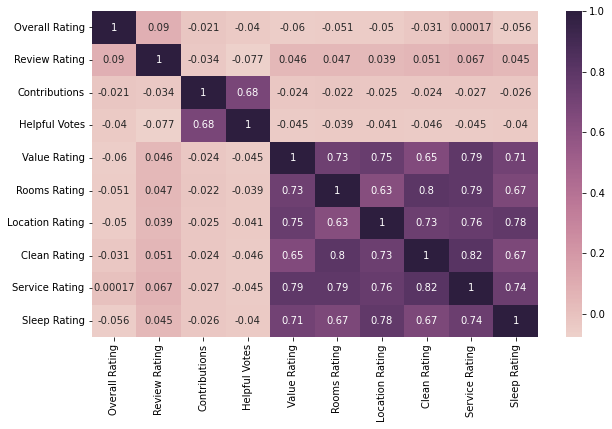

In [8]:
h_labels = [x.replace('_', ' ').title() for x in list(data.select_dtypes(include=['number', 'bool']).columns.values)]
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(data.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [9]:
# #how to name curve with corresponding hotel name??
# dist=data['review_rating'].groupby(data["hotel_name"])
# dist.plot(kind='kde', figsize=(10,6), title='Distribution of Review Rating')

In [10]:
data['review_rating'].value_counts()

5.0    774
4.0    166
3.0     71
1.0     57
2.0     47
Name: review_rating, dtype: int64

In [11]:
data.describe()

,overall_rating,review_rating,contributions,helpful_votes,value_rating,rooms_rating,location_rating,clean_rating,service_rating,sleep_rating
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,44.632287,4.392825,42.759641,17.713901,0.079821,0.077130,0.079821,0.087892,0.122870,0.068161
std,2.645961,1.110559,188.474361,43.073064,0.611012,0.591203,0.624094,0.651877,0.759244,0.557968
min,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,5.000000,18.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,5.000000,3915.000000,455.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


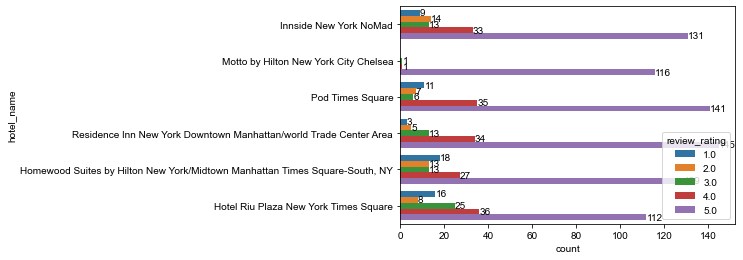

In [12]:
ax1=sns.countplot(y="hotel_name", hue="review_rating", data=data)
for container in ax1.containers:
    ax1.bar_label(container)
sns.set(rc={'figure.figsize':(10,10)})

In [13]:
#if we consider users who have provided a review 5 times before
criteria = data[data['contributions'] >= 5.0]

criteria


,hotel_name,overall_rating,date_of_review,user_name,review_rating,review_title,review_text,date_of_stay,contributions,helpful_votes,value_rating,rooms_rating,location_rating,clean_rating,service_rating,sleep_rating,month_of_review,month_of_stay,quarter_of_review,quarter_of_stay
1,Innside New York NoMad,45,21-Jun,Peggy M,5.0,The Innside Front Desk Staff,I just want to take a moment to say how wonder...,May 2021,8,11,0.0,4.0,0.0,5.0,5.0,0.0,Jun,May,Q2,Q2
4,Innside New York NoMad,45,22-Feb,Jeweliana159,5.0,"Amazing Hospitality Team - Kudos to Christina,...",I've stayed here on numerous occasions before ...,February 2022,25,4,5.0,0.0,0.0,0.0,5.0,0.0,Feb,February,Q1,Q1
7,Innside New York NoMad,45,22-Jan,Jay C,5.0,Great Weekend Stay in NYC,Spent a Saturday night in city to join friends...,January 2022,23,11,0.0,0.0,5.0,5.0,5.0,0.0,Jan,January,Q1,Q1
11,Innside New York NoMad,45,22-Jan,Mark R,4.0,Ideally situated,We stayed at the Innside when we visited with ...,January 2022,303,107,0.0,0.0,0.0,0.0,0.0,0.0,Jan,January,Q1,Q1
13,Innside New York NoMad,45,22-Jan,etremat,5.0,NYE in New York,Stayed at this beautiful hotel to celebrate ou...,December 2021,60,50,0.0,0.0,0.0,0.0,0.0,0.0,Jan,December,Q1,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,Hotel Riu Plaza New York Times Square,45,21-Jul,Denny820,5.0,Perfect,Perfect location. Hotel is new and modern. Par...,July 2021,7,20,0.0,0.0,0.0,0.0,0.0,0.0,Jul,July,Q3,Q3
1105,Hotel Riu Plaza New York Times Square,45,21-Jul,Tachita,4.0,"Best location, price, convenience I found for ...",Quick check in friendly staff. Wake up sooner...,July 2021,39,30,0.0,0.0,0.0,0.0,0.0,0.0,Jul,July,Q3,Q3
1106,Hotel Riu Plaza New York Times Square,45,21-Jul,faubel16,5.0,Cleanest Hotel In New York & Nicest Staff,All staff was very friendly and accommodating....,July 2021,22,13,0.0,0.0,0.0,0.0,0.0,0.0,Jul,July,Q3,Q3
1109,Hotel Riu Plaza New York Times Square,45,21-May,Robert W,4.0,Nice hotel located near Times Square,Spent the weekend at RIU for our first trip ou...,May 2021,139,44,0.0,0.0,0.0,0.0,0.0,0.0,May,May,Q2,Q2


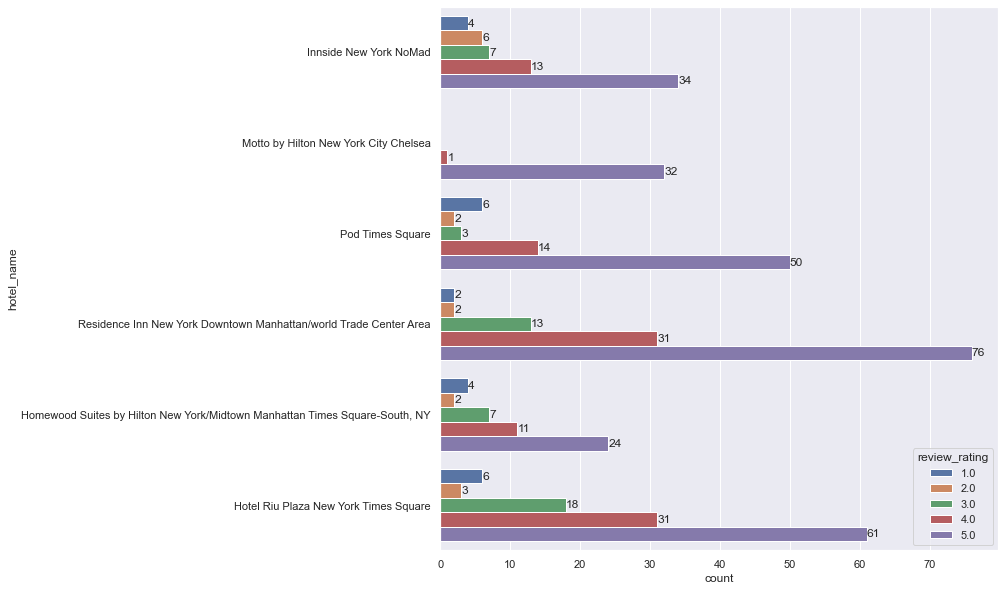

In [14]:
#overall review rating for users who have significant contributions in reviews on Trivago
ax2=sns.countplot(y="hotel_name", hue="review_rating", data=criteria)
for container in ax2.containers:
    ax2.bar_label(container)
sns.set(rc={'figure.figsize':(10,10)})

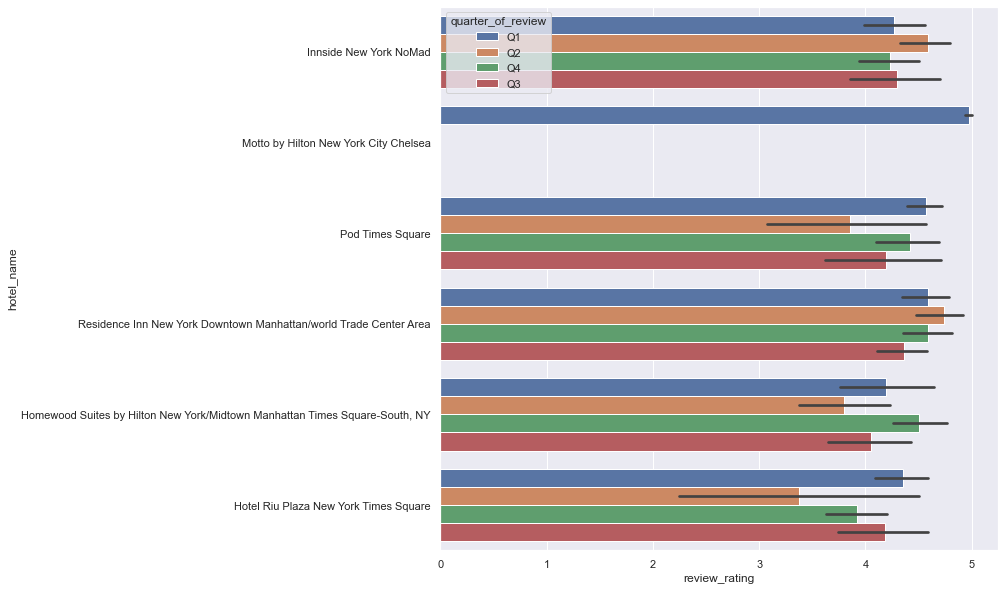

In [15]:
# Quarter wise distribution of review rating
sns.barplot(y="hotel_name",x="review_rating", hue="quarter_of_review", data=data)
sns.set(rc={'figure.figsize':(10,10)})

# NLP

In [77]:
import textblob            
from textblob import TextBlob


(-0.5, 1599.5, 799.5, -0.5)

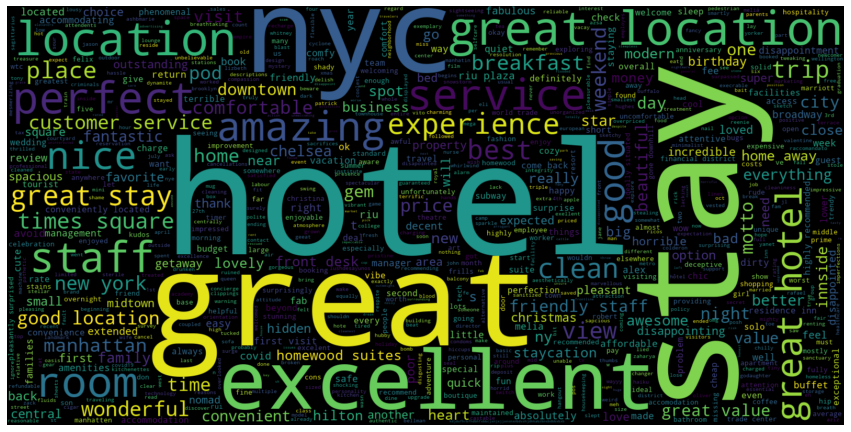

In [92]:
word_string=" ".join(data['review_title'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud( stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [93]:
data['cleaned_review_text']=data['review_text'].apply(lambda x: x.lower())

In [94]:
# Remove digits and words containing digits
data['cleaned_review_text']=data['cleaned_review_text'].apply(lambda x: re.sub('\w*\d\w*','', x))
# Remove Punctuations
data['cleaned_review_text']=data['cleaned_review_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
# Removing extra spaces
data['cleaned_review_text']=data['cleaned_review_text'].apply(lambda x: re.sub(' +',' ',x))

In [98]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
# Lemmatization with stopwords removal
data['lemmatized']=data['cleaned_review_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
data.head(3)

In [ ]:
import textblob            
from textblob import TextBlob

# link : https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
#need to check how polarity is calculated

data['polarity']=data['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(data.iloc[data['polarity'].sort_values(ascending=False)[:3].index]['review_text']):
  print('Review {}:\n'.format(index+1),review)

In [ ]:
data.head(3)

In [ ]:
df1 = data.groupby(['hotel_name', 'review_rating'], as_index=False).mean()
df1.plot(x="hotel_name", y=['review_rating'], kind="bar")